<a href="https://colab.research.google.com/github/tkryu91/Study-Numpy-Pandas/blob/main/n113a_data_manipulation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [1]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'

In [2]:
df1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [3]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df[-1:]

df1 = mydf('000080.csv')
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [4]:
df_original = pd.concat([df1, df2, df3, df4, df5, df6])
df_a = df_original[["매출액", "자산총계","EPS(원)"]]
df_a = df_a.reset_index(drop=True)
df_a


Unnamed: 0,매출액,자산총계,EPS(원)
0,"6,243","39,617",453
1,205,"1,555",3
2,"5,980","34,066","1,682"
3,521,"1,897",-61
4,"4,108","18,966","1,168"
5,"2,613","8,550",62


In [5]:
df_name = pd.DataFrame({"종목명" : ["하이트진로", "보해양조", "롯데칠성", "마니커", "이지홀딩스", "하림"]})
df_name

,종목명
0,하이트진로
1,보해양조
2,롯데칠성
3,마니커
4,이지홀딩스
5,하림


In [6]:
df = pd.concat([df_name, df_a], axis=1)
df.replace(",","", regex=True, inplace=True)
df = df.astype({"매출액" : float, "자산총계" : float, "EPS(원)" : float})
df.dtypes

종목명        object
매출액       float64
자산총계      float64
EPS(원)    float64
dtype: object

In [7]:
df

,종목명,매출액,자산총계,EPS(원)
0,하이트진로,6243.0,39617.0,453.0
1,보해양조,205.0,1555.0,3.0
2,롯데칠성,5980.0,34066.0,1682.0
3,마니커,521.0,1897.0,-61.0
4,이지홀딩스,4108.0,18966.0,1168.0
5,하림,2613.0,8550.0,62.0


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [8]:
import seaborn as sns
df_tidy = df.melt(id_vars="종목명", var_name = "Feature", value_name = "Value", value_vars=["매출액","자산총계", "EPS(원)"])
df_tidy

,종목명,Feature,Value
0,하이트진로,매출액,6243.0
1,보해양조,매출액,205.0
2,롯데칠성,매출액,5980.0
3,마니커,매출액,521.0
4,이지홀딩스,매출액,4108.0
5,하림,매출액,2613.0
6,하이트진로,자산총계,39617.0
7,보해양조,자산총계,1555.0
8,롯데칠성,자산총계,34066.0
9,마니커,자산총계,1897.0


In [9]:
wide = df_tidy.pivot_table(index = "종목명", columns = "Feature", values = "Value")
wide

Feature,EPS(원),매출액,자산총계
종목명,,,
롯데칠성,1682.0,5980.0,34066.0
마니커,-61.0,521.0,1897.0
보해양조,3.0,205.0,1555.0
이지홀딩스,1168.0,4108.0,18966.0
하림,62.0,2613.0,8550.0
하이트진로,453.0,6243.0,39617.0


In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [11]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmsy10',
 'DejaVu Sans Display',
 'cmex10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmmi10',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmr10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmb10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'Liberation Mono',
 'Liberation Sans',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumSquare',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'NanumGothic',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumMyeongjo',
 'Liberation Mono',
 'Liberation

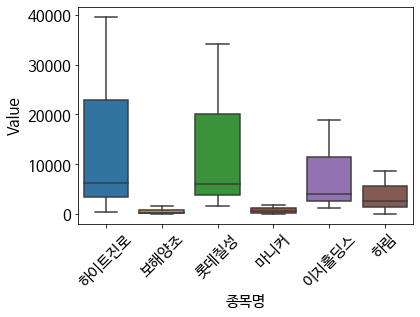

In [12]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
plt.rcParams['font.size'] = 15
plt.xticks(rotation = 45 )

sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');


In [13]:
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [14]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [15]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [16]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [17]:

df2 = left.merge(right, how = "left", on = ["key1", "key2"])
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [18]:
import numpy as np
print(df['매출액'][2] == 5980)
print(df['자산총계'][3] == 1897)   
print(df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
print(res == 6)
print(round(df_tidy['Value'].mean(), 3) == 7090.444)


True
True
True
True
True


In [19]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6)
  score += (round(df_tidy['Value'].mean(), 3) == 7090.444)
  return(score)

In [20]:
grade(df, df2, df_tidy, res)

5

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [21]:
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

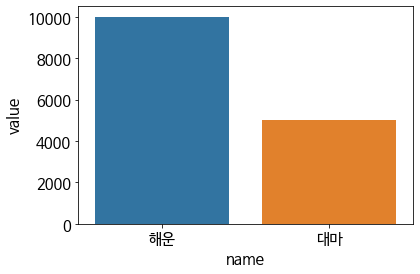

In [22]:
sns.barplot(x = 'name', y = 'value', data = dat);

In [23]:
import pandas as pd 


def company(code, name, cap):
  # 웹 크롤링해서 해당 종목 재무제표 가져오기
    url_tmpl = 'https://finance.naver.com/item/main.nhn?code=%s' 
    url = url_tmpl % (code)
    tables = pd.read_html(url, encoding='euc-kr') 
    code = tables[3]

# 행/열 바꾸기, 헤더 지정하기, 특정 칼럼 추출하기
    code = code.T
    new_header = code.iloc[0]
    code = code[1:]
    code.columns = new_header
    code = code[["매출액", "EPS(원)"]]
    
# 2020.12 분기의 데이터만 추출하기
# 해당 데이터는 멀티 인덱스로 되어 있어서 각각의 인덱스 명 지정해서 추출
    code = code.loc["최근 분기 실적", "2020.12",:]

# 인덱스 재설정
    code = code.reset_index(drop=True)
# 칼럼 설정
    code.columns = ["매출액", "EPS(원)"]
# 종목명 & 자본총계 추가
    c_name = pd.DataFrame({"종목명" : [name]})
    code = pd.concat([c_name, code], axis=1)
    c_cap = pd.DataFrame({"자본총계" : [cap]})
    code = pd.concat([code, c_cap], axis=1)
    
    return code

# 함수로 각각의 데이터 만들기
com1 = company('005880', "대한해운", '8533')
com2 = company('028670', "팬오션", '28067')
com3 = company('044450', "KSS해운", '2689')
com4 = company('214310', "에스엘바이오닉스", '470')
com5 = company('052420', "오성첨단소재", '1944')
com6 = company('039230', "에이아이비트", '453')

# 하나의 데이터 프레임으로 만들기
com = pd.concat([com1, com2, com3, com4, com5, com6])
com = com.reset_index(drop=True)
com




,종목명,매출액,EPS(원),자본총계
0,대한해운,2222,23,8533
1,팬오션,6205,-26,28067
2,KSS해운,546,-237,2689
3,에스엘바이오닉스,66,-363,470
4,오성첨단소재,184,8,1944
5,에이아이비트,57,-187,453


In [24]:
# 해운 업종의 데이터
sea_r = pd.concat([com1, com2, com3])
sea_r = sea_r.reset_index(drop=True)
sea_r = sea_r.astype({"매출액" : float, "자본총계" : float, "EPS(원)" : float})

# 대마 업종의 데이터
mar_r = pd.concat([com4, com5, com6])
mar_r = mar_r.reset_index(drop=True)
mar_r = mar_r.astype({"매출액" : float, "자본총계" : float, "EPS(원)" : float})

# 해운 업종 mean값
sea = pd.DataFrame({
                    "평균 매출액" : [sea_r["매출액"].mean()],
                    "평균 EPS(원)" : [sea_r["EPS(원)"].mean()],
                    "평균 자본총계" : [sea_r["자본총계"].mean()]})

# 대마 업종 mean값
mar = pd.DataFrame({"평균 매출액" : [mar_r["매출액"].mean()],
                    "평균 EPS(원)" : [mar_r["EPS(원)"].mean()],
                    "평균 자본총계" : [mar_r["자본총계"].mean()]})

# 합치기 & 종목명 추가 & 종목명 인덱스 지정
sea_mar = pd.concat([sea, mar])

sea_mar.insert(0, "종목명", ["해운", "대마"])
sea_mar.set_index("종목명")


,평균 매출액,평균 EPS(원),평균 자본총계
종목명,,,
해운,2991.000000,-80.000000,13096.333333
대마,102.333333,-180.666667,955.666667


In [25]:
import seaborn as sns

# tidy 만들기
sea_mar_tidy = sea_mar.melt(id_vars = "종목명", value_vars = ["평균 매출액", "평균 EPS(원)", "평균 자본총계"], var_name = "Features", value_name = "Value")

sea_mar_tidy

,종목명,Features,Value
0,해운,평균 매출액,2991.000000
1,대마,평균 매출액,102.333333
2,해운,평균 EPS(원),-80.000000
3,대마,평균 EPS(원),-180.666667
4,해운,평균 자본총계,13096.333333
5,대마,평균 자본총계,955.666667


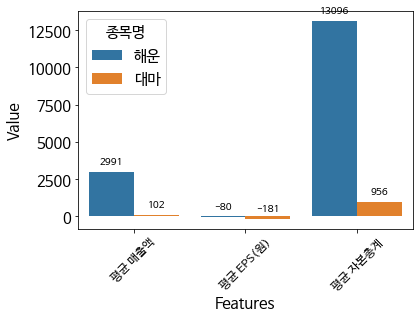

In [26]:

# Feature 별 업종 비교
g = sns.barplot(data= sea_mar_tidy,x= "Features",y= "Value", hue="종목명")
ax = g

###############################
# 아래 코드 공부 필요....
# plt 사용법
# .patches
# ha, va
# xytext
# textcoords
###############################
import matplotlib.pyplot as plt

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show()


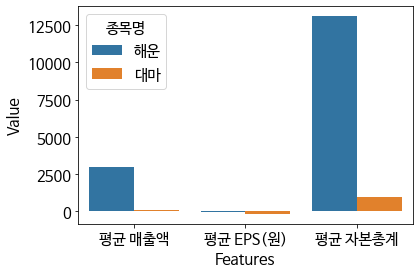

In [27]:
sns.barplot(data= sea_mar_tidy,x= "Features",y= "Value", hue="종목명")